<center>
    <center><h3>New York Housing Market - EDA</h3><br>
<center> This notebook serves as a showcase of my Exploratory Data Analysis (EDA) ability in Python. The purpose of EDA is to gain a comprehensive understanding of a dataset's structure, patterns, and relationships through visual and statistical exploration. By examining data distributions, identifying outliers, and assessing data quality, EDA informs subsequent analysis and hypothesis generation, facilitating effective communication of insights to stakeholders. Therefore, this notebook will primarily emphasize visualisations to ensure that the narrative within the data can be effectively communicated to stakeholders, regardless of their statistical proficiency.
    
<center><br>The aim of this project is to explore the relationship between demographics of new york residents, their incomes and the location of their housing from the New York census and a New York City housing market database.
    
   **NY Housing Market Dataset:** [Click Here](https://www.kaggle.com/datasets/nelgiriyewithana/new-york-housing-market/data)
    <br>**Brooklyn Housing Market Dataset 2015:** [Click Here](https://www.kaggle.com/datasets/tianhwu/brooklynhomes2003to2017/data)
   <br>**NY Census Datasets:** [Click Here](https://www.kaggle.com/datasets/muonneutrino/new-york-city-census-data/data)
    
    

    


<left>
    <left><h3> Importing Libraries and Data </h3><br>

        
       
      

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gp
%matplotlib inline


<left>
    <left><h3> Check For Missing Data</h3><br>

In [2]:
housing = pd.read_csv('NY-House-Dataset.csv', index_col=0)
census = pd.read_csv('nyc_census_tracts.csv', index_col=0)
census_loc = pd.read_csv('census_block_loc.csv', index_col=0)

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4801 entries, Brokered by Douglas Elliman  -111 Fifth Ave to Brokered by Nyc Realty Brokers Llc
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TYPE                         4801 non-null   object 
 1   PRICE                        4801 non-null   int64  
 2   BEDS                         4801 non-null   int64  
 3   BATH                         4801 non-null   float64
 4   PROPERTYSQFT                 4801 non-null   float64
 5   ADDRESS                      4801 non-null   object 
 6   STATE                        4801 non-null   object 
 7   MAIN_ADDRESS                 4801 non-null   object 
 8   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 9   LOCALITY                     4801 non-null   object 
 10  SUBLOCALITY                  4801 non-null   object 
 11  STREET_NAME                  4801 non-null   object 
 12  LONG_NAME

<br><h4><left> No missing data.

In [4]:
census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2167 entries, 36005000100 to 36085990100
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   County           2167 non-null   object 
 1   Borough          2167 non-null   object 
 2   TotalPop         2167 non-null   int64  
 3   Men              2167 non-null   int64  
 4   Women            2167 non-null   int64  
 5   Hispanic         2128 non-null   float64
 6   White            2128 non-null   float64
 7   Black            2128 non-null   float64
 8   Native           2128 non-null   float64
 9   Asian            2128 non-null   float64
 10  Citizen          2167 non-null   int64  
 11  Income           2101 non-null   float64
 12  IncomeErr        2101 non-null   float64
 13  IncomePerCap     2121 non-null   float64
 14  IncomePerCapErr  2121 non-null   float64
 15  Poverty          2125 non-null   float64
 16  ChildPoverty     2107 non-null   float64
 1

<br><h4><left> Most columns contain missing data. No more than ~ 3% however.

In [5]:
census_loc.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 38396 entries, 40.48 to 40.93
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Longitude  38396 non-null  float64
 1   BlockCode  38396 non-null  int64  
 2   County     38396 non-null  object 
 3   State      38396 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.5+ MB


<br><h4><left> Significant amount of missing data, however, the loss seems very structured given most columns contain either 18053 data points or 12777. 
    <br> - It seems likely that there is a class in the dataframe, perhaps a whole county, containing null values.

<left>
    <left><h3> Data Overview</h3><br>

In [6]:
housing.head()

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
BROKERTITLE,,,,,,,,,,,,,,,,
Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
Brokered by Sotheby's International Realty - East Side Manhattan Brokerage,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [7]:
census.head()

,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
CensusTract,,,,,,,,,,,,,,,,,,,,,
36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,1.6,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
36005000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,4.2,...,2.9,0.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7
36005000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,0.3,...,1.4,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5
36005001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,0.0,...,8.6,1.6,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7
36005001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,2.1,...,3.0,2.4,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2


In [8]:
census_loc.head()

,Longitude,BlockCode,County,State
Latitude,,,,
40.48,-74.280000,340230076002012,Middlesex,NJ
40.48,-74.276834,340230076005000,Middlesex,NJ
40.48,-74.273668,340230076003018,Middlesex,NJ
40.48,-74.270503,340230076003004,Middlesex,NJ
40.48,-74.267337,340230074021000,Middlesex,NJ


In [9]:
print
("housing dataset dimensions: {}".format(housing.shape),
"census dataset dimensions: {}".format(census.shape),
"census location dataset dimensions: {}".format(census_loc.shape))

('housing dataset dimensions: (4801, 16)',
 'census dataset dimensions: (2167, 35)',
 'census location dataset dimensions: (38396, 4)')

<br><left> - The dataset, <i>census_loc</i> contains the coordinates and block codes for different blocks within the city of New York. 
    <br> - The <i>census</i> dataset contains the census tract codes (codes for designated geospatial areas) from the whole of the NY State. 
    <br>- First we must combine these two, relating the block codes from <i>census_loc</i> to the tract codes in <i>census</i>.
    <br>- Later, we can merge the resultant dataset with the <i>housing</i> dataset, through their shared coordinate data.

<left>
    <left><h3> Combining Census Datasets</h3><br>
        <br> Let's filter out the counties from the "County" column in the <i>census_loc</i> dataset that aren't in the city.
        <br> Next, we'll create a new column in the <i>census_loc</i> dataset called "Tract", and fill it with census tract values, found by removing the 4 digits at the end of block code values.
        <br> Then, we can perform a left merge on the <i>census_loc</i> dataset through the new "Tract" column and the <i>census</i> dataset's "CensusTract" column.
        
        

In [10]:
census_loc = census_loc[census_loc["County"].isin(['Bronx','Kings','New York','Queens','Richmond'])]
census_loc["Tract"] = census_loc.BlockCode // 10000
census_loc = census_loc.merge(census,how='left',right_index=True,left_on='Tract')
census_loc.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 18053 entries, 40.48 to 40.9164321608
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Longitude        18053 non-null  float64
 1   BlockCode        18053 non-null  int64  
 2   County_x         18053 non-null  object 
 3   State            18053 non-null  object 
 4   Tract            18053 non-null  int64  
 5   County_y         18052 non-null  object 
 6   Borough          18052 non-null  object 
 7   TotalPop         18052 non-null  float64
 8   Men              18052 non-null  float64
 9   Women            18052 non-null  float64
 10  Hispanic         12999 non-null  float64
 11  White            12999 non-null  float64
 12  Black            12999 non-null  float64
 13  Native           12999 non-null  float64
 14  Asian            12999 non-null  float64
 15  Citizen          18052 non-null  float64
 16  Income           11947 non-null  float64
 17

In [11]:
census_loc.head(10)


,Longitude,BlockCode,County_x,State,Tract,County_y,Borough,TotalPop,Men,Women,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
Latitude,,,,,,,,,,,,,,,,,,,,,
40.480000,-74.232513,360859901000011,Richmond,NY,36085990100,Richmond,Staten Island,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
40.480000,-74.229347,360859901000011,Richmond,NY,36085990100,Richmond,Staten Island,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
40.480000,-74.226181,360859901000011,Richmond,NY,36085990100,Richmond,Staten Island,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
40.480000,-74.223015,360859901000011,Richmond,NY,36085990100,Richmond,Staten Island,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
40.480000,-74.219849,360859901000011,Richmond,NY,36085990100,Richmond,Staten Island,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
40.480000,-74.216683,360859901000010,Richmond,NY,36085990100,Richmond,Staten Island,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
40.480000,-74.213518,360859901000010,Richmond,NY,36085990100,Richmond,Staten Island,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
40.482261,-74.238844,360859901000012,Richmond,NY,36085990100,Richmond,Staten Island,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
40.482261,-74.235678,360859901000011,Richmond,NY,36085990100,Richmond,Staten Island,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [12]:
census_loc.Income = pd.to_numeric(census_loc.Income,errors='coerce')

<left>
    <left><h3> Investigating Missing Values</h3><br>
        <br> As visible from the cell above, after combining our datasets, the top rows of our new dataset are missing data. We discovered this in our New York state data earlier, but now it's clear a group of datapoints from inside the city are missing. <br>Lets plot the first missing datapoint from the table header above: (40.48, -74.232513).

In [13]:
import folium


# Coordinates to plot
coordinates = (-74.232513, 40.48)

# Create a map centered around the given coordinates
nyc_map = folium.Map(location=[coordinates[1], coordinates[0]], zoom_start=12)

# Add a marker for the coordinate
folium.Marker([coordinates[1], coordinates[0]], popup="Coordinate").add_to(nyc_map)

# Save the map as an HTML file
nyc_map.save("nyc_map.html")

In [14]:
from IPython.display import IFrame

# Path to the map HTML file
html_file_path = 'nyc_map.html'

# Display the map in the notebook
IFrame(src=html_file_path, width=700, height=500)

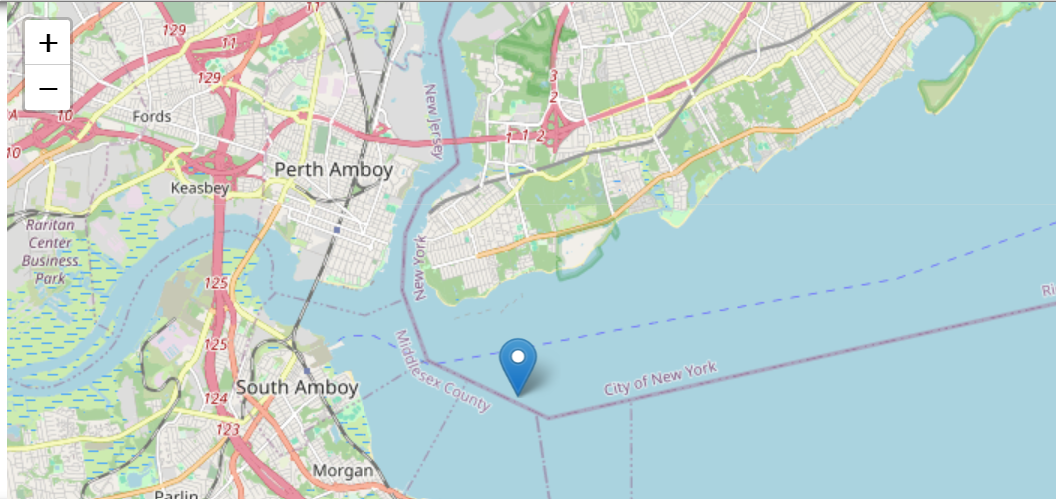

<br> From the map above, the missing datapoints are erroneous, appearing to be located by the New York, New Jersey border, above the sea. For this reason we can exclude these data points from the rest of our analysis, as they also seem to be the source of the missing values visible in the table above and in the check for missing data nearer the beginning of the notebook.

In [19]:
# Function to remove outliers based on IQR
df_updated = census_loc

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Removing outliers from each column
df_filtered = df_updated.copy()
for col in ['Income']:
    df_filtered = remove_outliers(df_filtered, col)

# Comparing the shapes of the original and filtered datasets
original_shape = df_updated.shape
filtered_shape = df_filtered.shape

original_shape, filtered_shape

((18053, 40), (11841, 40))

In [ ]:
def convert_to_2d(lats,lons,values):
    latmin = 40.48
    lonmin = -74.28
    latmax = 40.93
    lonmax = -73.65
    lon_vals = np.mgrid[lonmin:lonmax:200j]
    lat_vals = np.mgrid[latmin:latmax:200j]
    map_values = np.zeros([200,200])
    dlat = lat_vals[1] - lat_vals[0]
    dlon = lon_vals[1] - lon_vals[0]
    for lat,lon,value in zip(lats,lons,values):
        lat_idx = int(np.rint((lat - latmin) / dlat))
        lon_idx = int(np.rint((lon-lonmin) / dlon ))        
        if not np.isnan(value):
            map_values[lon_idx,lat_idx] = value
    return lat_vals,lon_vals,map_values

In [20]:
def make_plot(data_values,title='',colors='Greens'):
    lat_vals,lon_vals,values = convert_to_2d(census_loc.index,census_loc.Longitude,data_values)
    fig = plt.figure(1,figsize=[10,10])
    limits = np.min(lon_vals),np.max(lon_vals),np.min(lat_vals),np.max(lat_vals)
    
    im = plt.imshow(values.T,origin='lower',cmap=colors,extent=limits)
    plt.xlabel('Longitude [degrees]')
    plt.ylabel('Latitude [degrees]')
    plt.title(title)
    plt.colorbar(im,fraction=0.035, pad=0.04)
    
    plt.show()

In [ ]:
make_plot(census_loc.Income,colors='Blues',title='NYC Income Distribution')
